In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_df = pd.read_csv("./data/covid_19_data.csv")

In [3]:
covid_df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
df = covid_df

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
df.drop(columns = 'Last Update',inplace = True)

In [7]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     26449
Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
df['Province/State'].fillna(df['Country/Region'],inplace = True)

In [9]:
#Active Cases
df['Active'] = df.Confirmed - df.Deaths - df.Recovered

In [10]:
df

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
77462,77463,2020-08-01,Zaporizhia Oblast,Ukraine,800.0,21.0,597.0,182.0
77463,77464,2020-08-01,Zeeland,Netherlands,867.0,69.0,0.0,798.0
77464,77465,2020-08-01,Zhejiang,Mainland China,1270.0,1.0,1268.0,1.0
77465,77466,2020-08-01,Zhytomyr Oblast,Ukraine,1896.0,37.0,1485.0,374.0


In [16]:
df.to_csv('Data_preprocessed.csv')

In [49]:
by_months_df = df.groupby(df['ObservationDate'].dt.month)[['Confirmed','Deaths','Recovered','Active']].agg('sum')
by_months_df

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
1,38535.0,889.0,844.0,36802.0
2,1671959.0,46898.0,380794.0,1244267.0
3,8894726.0,386173.0,2707659.0,5800894.0
4,63402405.0,4176098.0,16414806.0,42811501.0
5,144769885.0,9568332.0,54214094.0,80987459.0
6,246575254.0,13285446.0,118668091.0,114621717.0
7,431478983.0,18390569.0,242129048.0,170959366.0
8,17849853.0,685054.0,10553585.0,6611214.0


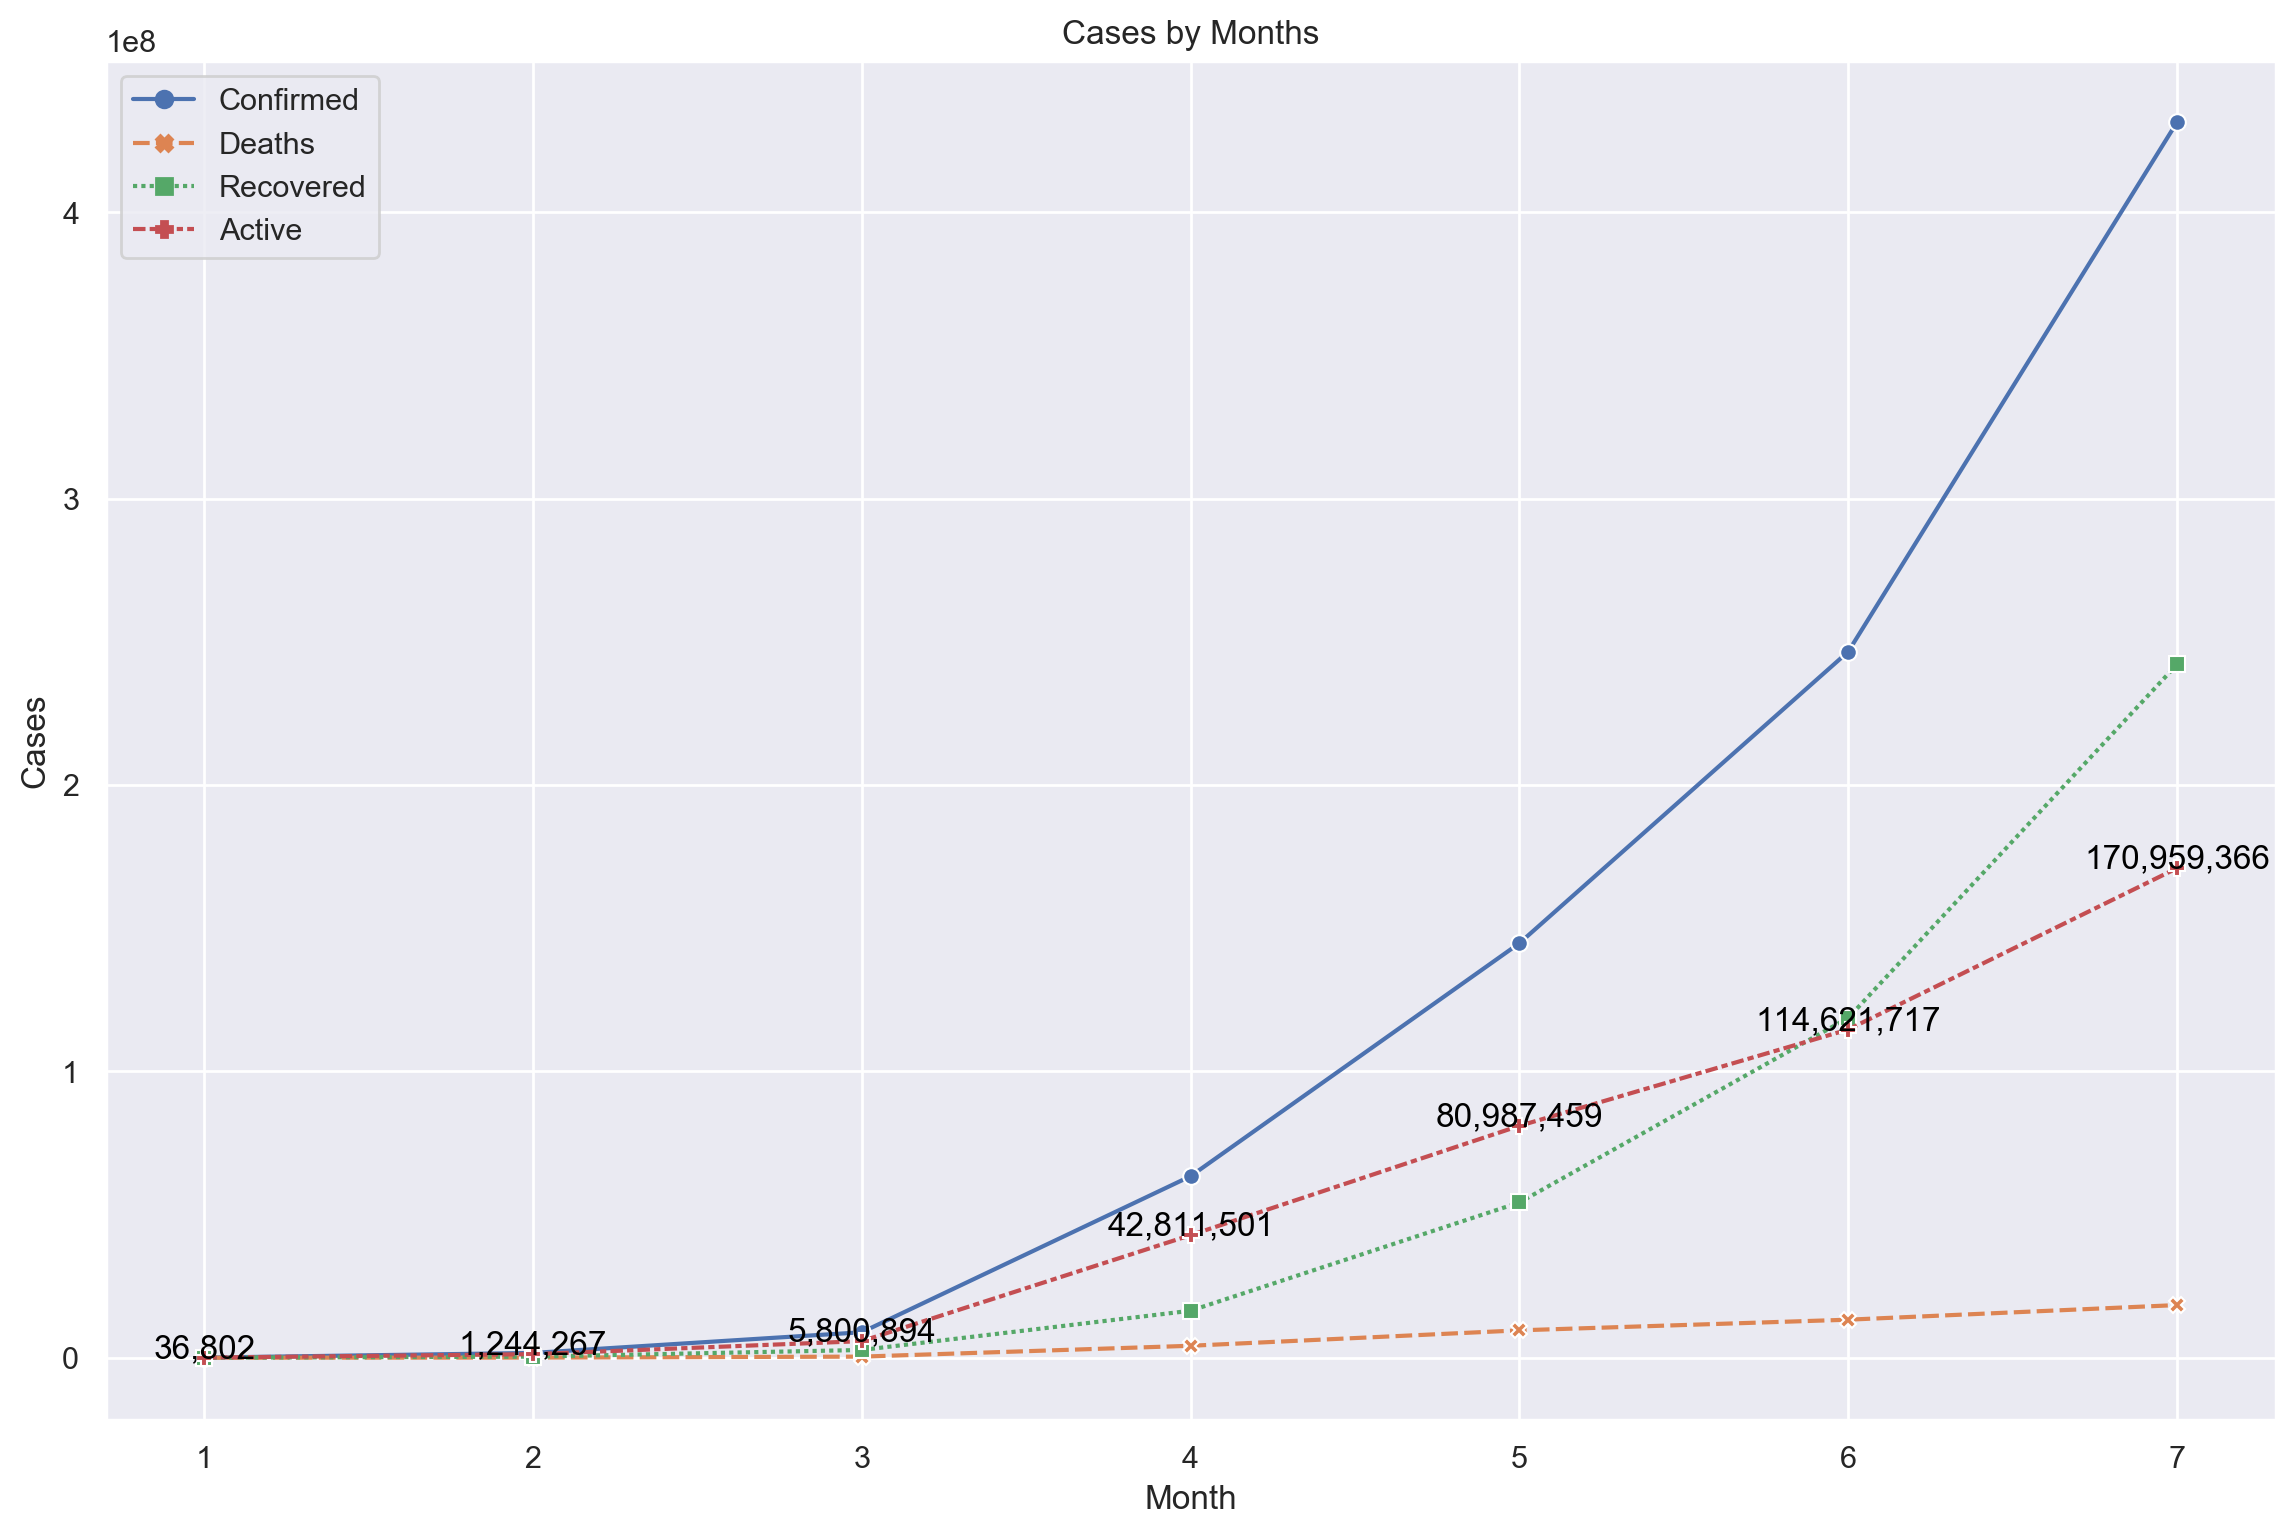

In [50]:
plt.figure(figsize = (14,9),dpi = 200)
sns.set(style="darkgrid")
ax = sns.lineplot(hue="class", style="logic", markers=True,data = by_months_df.iloc[0:-1])
ax.set_title('Cases by Months')
ax.set_xlabel('Month')
ax.set_ylabel('Cases')
for index, row in by_months_df.iloc[0:-1].iterrows():
    ax.text(row.name, row.Active,f"{int(row.Active):,}",color='black', ha="center")

Text(0.5, 0, 'Month')

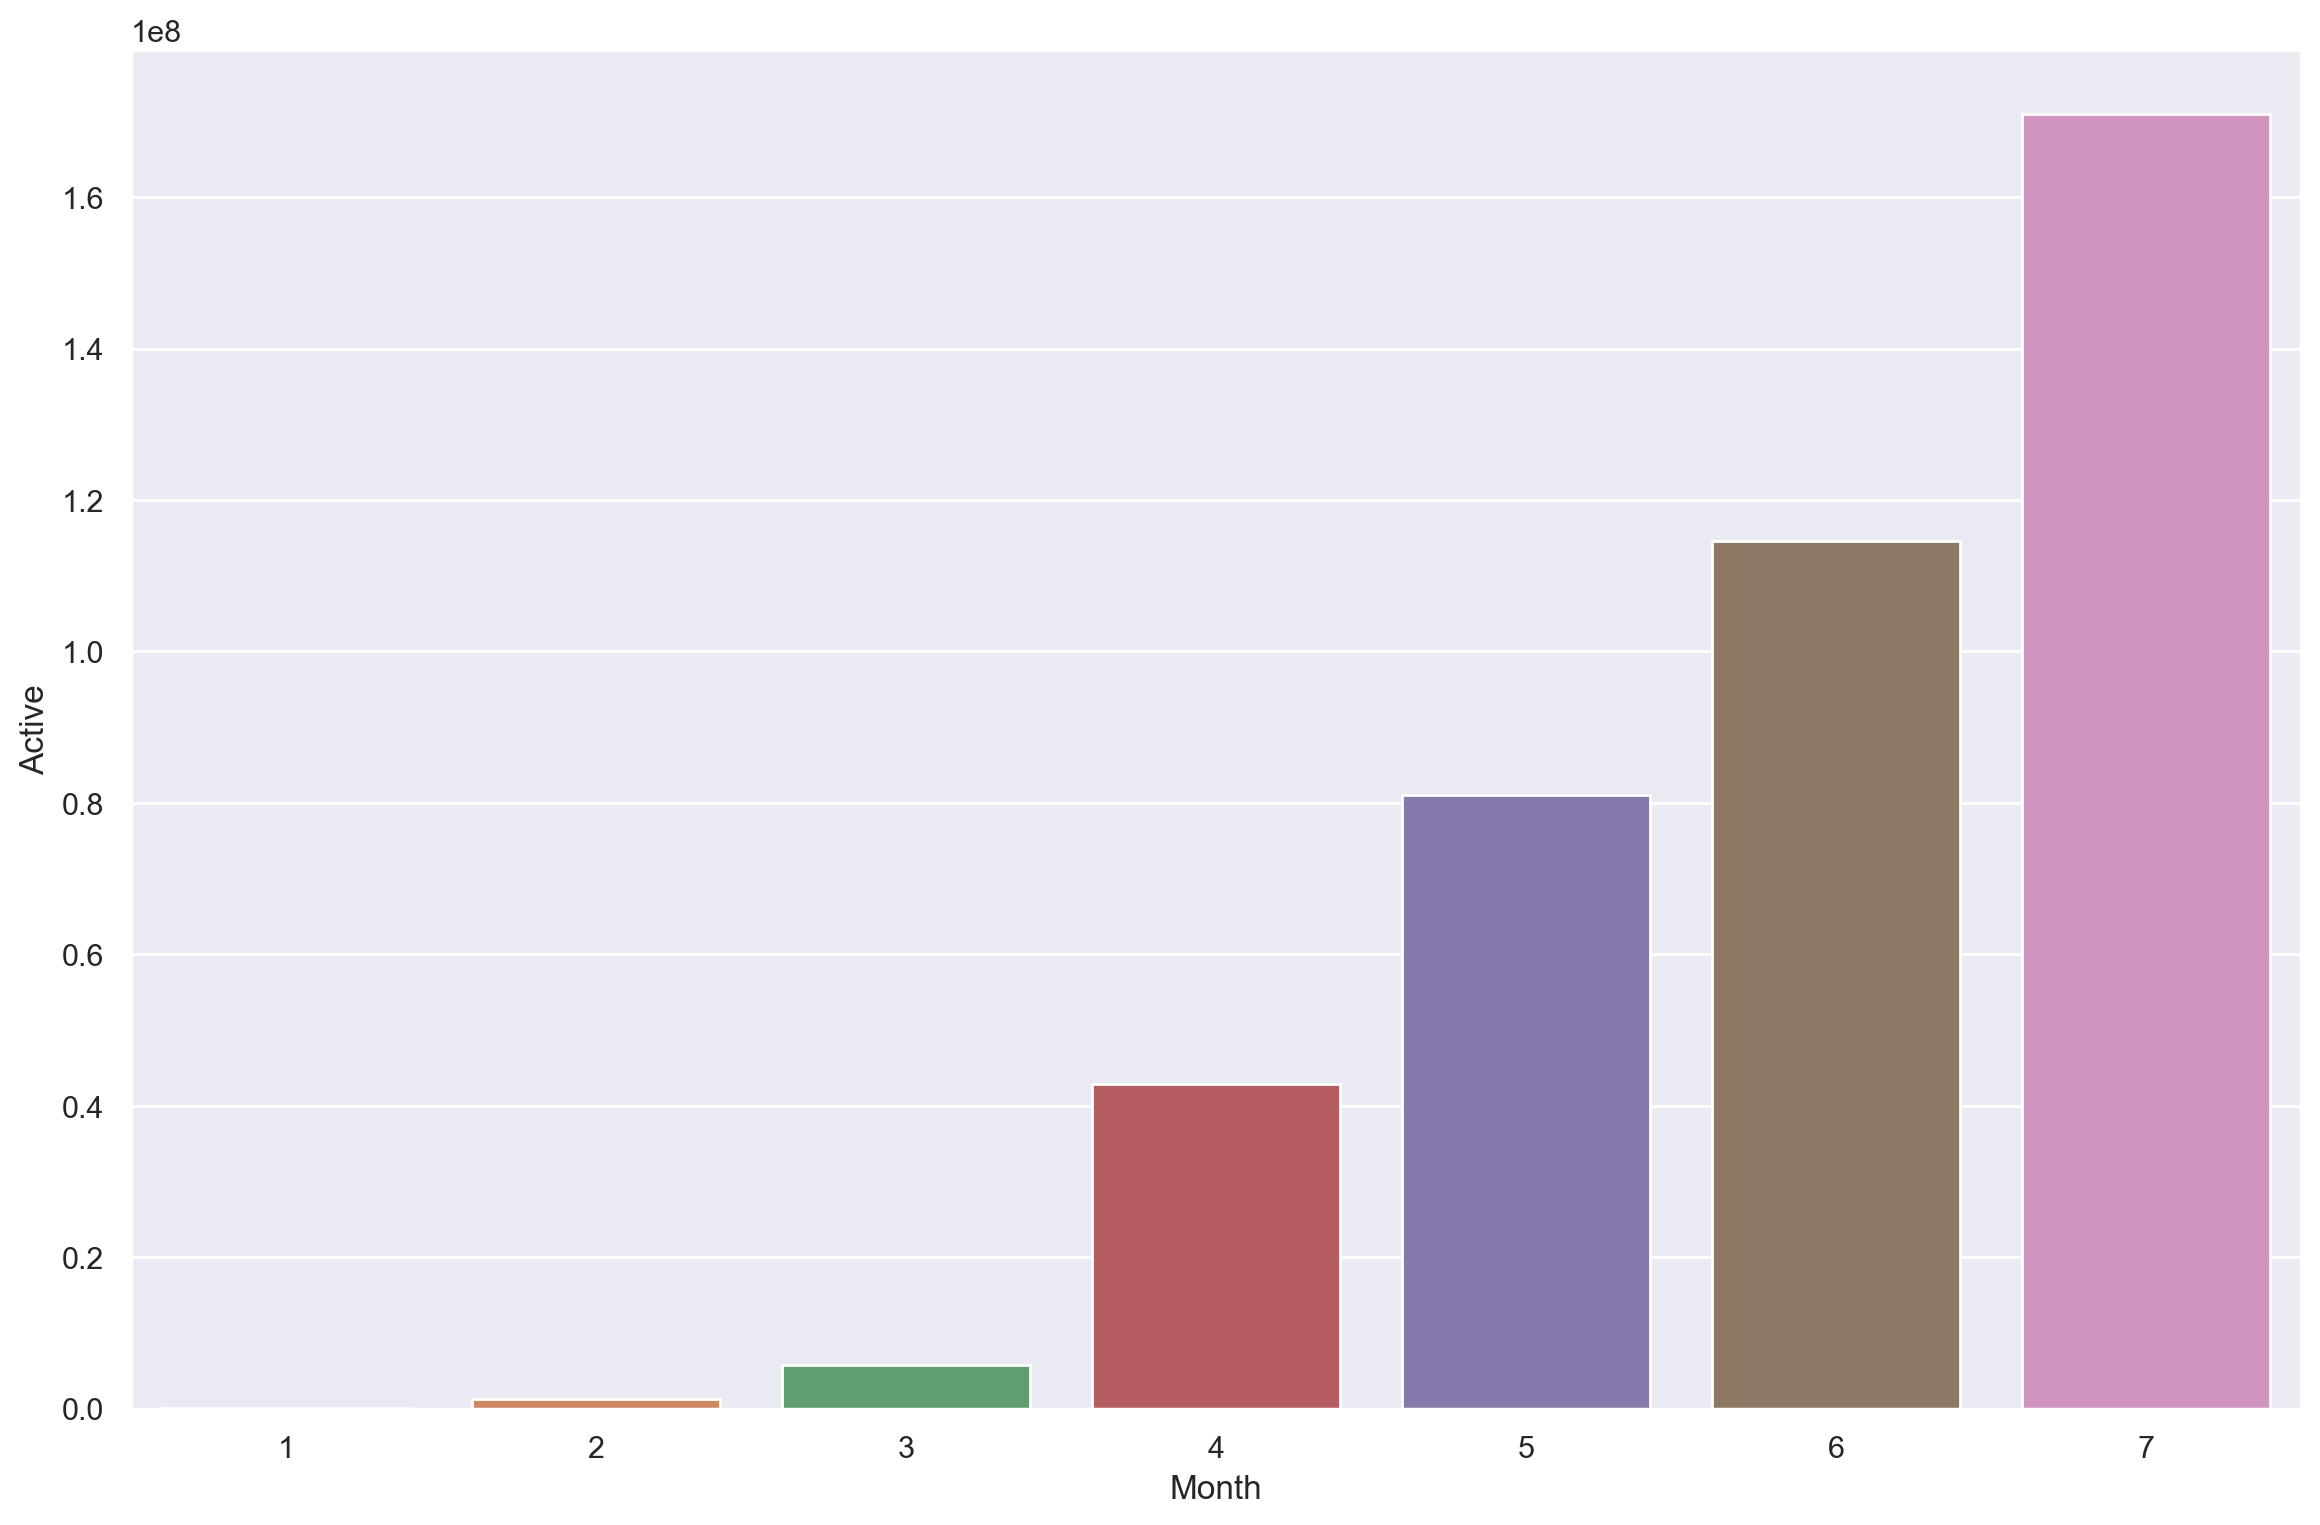

In [51]:
plt.figure(figsize = (14,9),dpi = 200)
ax = sns.barplot(x= by_months_df.index[0:-1], y= 'Active', data=by_months_df.iloc[0:-1])
ax.set_xlabel('Month')

In [160]:
df = pd.read_csv("./data/COVID19_open_line_list.csv")
df

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df['sex'] = df['sex'].str.upper()

In [162]:
df[['ID','sex']].to_csv('gender.csv')

In [157]:
df.isna().sum()

ID                            953
age                         12777
sex                         12862
city                         3932
province                     1220
country                       978
wuhan(0)_not_wuhan(1)         956
latitude                      979
longitude                     979
geo_resolution                979
date_onset_symptoms         13380
date_admission_hospital     13396
date_confirmation            1037
symptoms                    13633
lives_in_Wuhan              13561
travel_history_dates        13623
travel_history_location     13368
reported_market_exposure    14091
additional_information      11714
chronic_disease_binary      14108
chronic_disease             14113
source                       1176
sequence_available          14125
outcome                     13942
date_death_or_discharge     14033
notes_for_discussion        13939
location                    13102
admin3                      12967
admin2                       5058
admin1        

In [135]:
df['symptoms'] = df['symptoms'].str.split(';')

In [136]:
col = df.columns.to_list()
col.remove('symptoms')
col

['ID',
 'age',
 'sex',
 'city',
 'province',
 'country',
 'wuhan(0)_not_wuhan(1)',
 'latitude',
 'longitude',
 'geo_resolution',
 'date_onset_symptoms',
 'date_admission_hospital',
 'date_confirmation',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'source',
 'sequence_available',
 'outcome',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'admin3',
 'admin2',
 'admin1',
 'country_new',
 'admin_id',
 'data_moderator_initials',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'level_44']

In [137]:
df = (df
 .set_index(col)['symptoms']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .rename(columns={0:'symptoms'}))

In [138]:
df['symptoms'] = df['symptoms'].str.upper()

In [141]:
list_s = df['symptoms'].to_list()
a = []
for s in list_s:
    i = None if s.find(' (') < 0 else s.find(' (')
    s = s[:i]
    i = None if s.find('3') < 0 else s.find('3')
    s = s[:i]    
    a.append(s)
df['symptoms'] = a

In [142]:
df[df['ID'] == 11799]['symptoms'].to_list()[0]

'FEVER'

In [143]:
df[['ID','age','sex','country','symptoms']].to_csv('symptoms.csv')

In [128]:
s = 'abc (123)'
s = s[:None]
s

'abc (123)'